In [1]:
!pip install streamlit
!pip install app.py


import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00
ERROR: app.py from https://files.pythonhosted.org/packages/92/54/dfb60298bcb00f09cb14c443f3612e2f5da39f37a1837447cbc1e03159c1/App.py-1.5.tar.gz does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [2]:
df = pd.read_csv('/content/Youth Tobacco Survey In Indian States.csv')
df.head()

,Unnamed: 0,State,Area,Ever_Tob_Use,Curr_Tob_Use,Ever_Smoke,Curr_Smoke,Ever_Cig,Curr_Cig,Ever_Bidi,...,Seen_Cig_Ads_POS,Taught_Tob_Effects,Hard_To_Quit,SHS_Harmful,Ban_Indoor,Ban_Outdoor,Aware_COTPA,Fine_Auth,Tobacco_Free_Guideline,Aware_Board_Policy
0,0,India,Total,18.1,8.5,11.0,7.3,4.6,2.6,4.1,...,17.5,37.8,26.0,70.6,58.1,60.5,85.4,38.2,82.1,82.5
1,1,India,Urban,13.5,5.5,8.1,4.5,4.1,2.3,3.7,...,16.3,34.1,30.1,73.3,64.8,67.4,86.9,36.4,82.4,83.0
2,2,India,Rural,19.5,9.4,11.8,8.1,4.7,2.6,4.3,...,17.8,38.9,24.8,69.8,56.1,58.6,84.6,39.2,81.9,82.2
3,3,Andaman and Nicobar Islands,Total,21.5,4.4,8.8,3.7,4.4,1.3,2.7,...,21.1,23.4,23.0,69.0,65.0,60.6,88.6,1.1,76.0,67.9
4,4,Andaman and Nicobar Islands,Urban,13.3,3.4,6.5,2.6,3.7,1.3,2.0,...,20.2,25.7,26.9,66.6,65.1,60.9,89.1,0.0,85.3,42.5


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,State,Area,Ever_Tob_Use,Curr_Tob_Use,Ever_Smoke,Curr_Smoke,Ever_Cig,Curr_Cig,Ever_Bidi,Curr_Bidi,...,Seen_Cig_Ads_POS,Taught_Tob_Effects,Hard_To_Quit,SHS_Harmful,Ban_Indoor,Ban_Outdoor,Aware_COTPA,Fine_Auth,Tobacco_Free_Guideline,Aware_Board_Policy
0,India,Total,18.1,8.5,11.0,7.3,4.6,2.6,4.1,2.1,...,17.5,37.8,26.0,70.6,58.1,60.5,85.4,38.2,82.1,82.5
1,India,Urban,13.5,5.5,8.1,4.5,4.1,2.3,3.7,1.9,...,16.3,34.1,30.1,73.3,64.8,67.4,86.9,36.4,82.4,83.0
2,India,Rural,19.5,9.4,11.8,8.1,4.7,2.6,4.3,2.2,...,17.8,38.9,24.8,69.8,56.1,58.6,84.6,39.2,81.9,82.2
3,Andaman and Nicobar Islands,Total,21.5,4.4,8.8,3.7,4.4,1.3,2.7,1.0,...,21.1,23.4,23.0,69.0,65.0,60.6,88.6,1.1,76.0,67.9
4,Andaman and Nicobar Islands,Urban,13.3,3.4,6.5,2.6,3.7,1.3,2.0,0.7,...,20.2,25.7,26.9,66.6,65.1,60.9,89.1,0.0,85.3,42.5


In [4]:
for col in ["Age_Init_Cig", "Age_Init_Bidi", "Age_Init_SLT", "Cig_Stick", "Seen_Use_Media"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 106
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   90 non-null     object 
 1   Area                    90 non-null     object 
 2   Ever_Tob_Use            90 non-null     float64
 3   Curr_Tob_Use            90 non-null     float64
 4   Ever_Smoke              90 non-null     float64
 5   Curr_Smoke              90 non-null     float64
 6   Ever_Cig                90 non-null     float64
 7   Curr_Cig                90 non-null     float64
 8   Ever_Bidi               90 non-null     float64
 9   Curr_Bidi               90 non-null     float64
 10  Ever_SLT                90 non-null     float64
 11  Curr_SLT                90 non-null     float64
 12  Ever_PM_Tob             90 non-null     float64
 13  Suscept_Cig             90 non-null     float64
 14  Age_Init_Cig            90 non-null     float64


In [6]:
df.describe()

,Ever_Tob_Use,Curr_Tob_Use,Ever_Smoke,Curr_Smoke,Ever_Cig,Curr_Cig,Ever_Bidi,Curr_Bidi,Ever_SLT,Curr_SLT,...,Seen_Cig_Ads_POS,Taught_Tob_Effects,Hard_To_Quit,SHS_Harmful,Ban_Indoor,Ban_Outdoor,Aware_COTPA,Fine_Auth,Tobacco_Free_Guideline,Aware_Board_Policy
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,24.173333,12.238889,15.850000,9.770000,10.924444,6.564444,7.483333,4.637778,17.866667,6.948889,...,18.762222,35.278889,29.527778,71.701111,64.584444,64.930000,87.632222,38.765556,81.527778,83.338889
std,20.395873,15.852988,18.062365,12.848761,16.579636,10.646931,10.004283,8.830254,16.943701,10.882501,...,6.791395,10.225013,10.799418,7.833743,11.857354,11.062574,14.712235,18.623732,16.278483,16.379253
min,3.800000,0.700000,2.400000,0.500000,0.900000,0.100000,1.000000,0.100000,2.200000,0.100000,...,8.300000,11.400000,11.600000,39.000000,40.300000,39.800000,42.900000,0.000000,33.300000,33.300000
25%,11.275000,3.400000,6.025000,2.600000,3.025000,1.100000,2.625000,1.025000,7.250000,1.225000,...,13.975000,26.275000,21.225000,68.450000,56.225000,58.025000,83.625000,26.400000,67.525000,76.125000
50%,16.350000,5.500000,9.000000,4.300000,4.550000,2.500000,3.750000,1.900000,10.250000,2.150000,...,17.800000,35.550000,26.950000,72.800000,65.000000,64.200000,91.950000,38.900000,85.300000,88.700000
75%,26.950000,9.200000,13.200000,8.000000,7.250000,4.375000,5.725000,3.050000,22.425000,5.300000,...,22.250000,42.550000,35.150000,75.725000,73.025000,71.850000,100.000000,52.175000,95.425000,94.325000
max,91.100000,69.200000,84.500000,59.600000,77.100000,47.800000,50.200000,47.400000,72.900000,47.800000,...,40.300000,60.600000,65.300000,88.700000,86.900000,92.100000,100.000000,80.000000,100.000000,100.000000


In [7]:
# Label encode categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["State"] = le.fit_transform(df["State"])
df["Area"] = le.fit_transform(df["Area"])

In [8]:
# Define features and target
target = "Curr_Tob_Use"
features = df.drop(columns=[target])
X = features
y = df[target] > df[target].median()  # binary classification

In [9]:
# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [13]:
# Streamlit UI
st.set_page_config(layout="wide")
st.title("Youth Tobacco Survey ML Dashboard")

2025-07-12 11:16:06.455 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:06.460 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:06.949 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-12 11:16:06.950 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:06.953 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [14]:
# sidebar
model_choice = st.sidebar.selectbox("Select Model", list(models.keys()))

2025-07-12 11:16:06.971 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:06.973 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:06.974 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:06.975 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:06.978 Session state does not function when running a script without `streamlit run`
2025-07-12 11:16:06.979 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:06.979 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:06.982 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [15]:
# Train model
model = models[model_choice]
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = model.predict(X_test)

2025-07-12 11:16:07.056 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:07.057 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:07.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:07.089 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:07.095 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:07.097 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:07.098 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:07.100 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

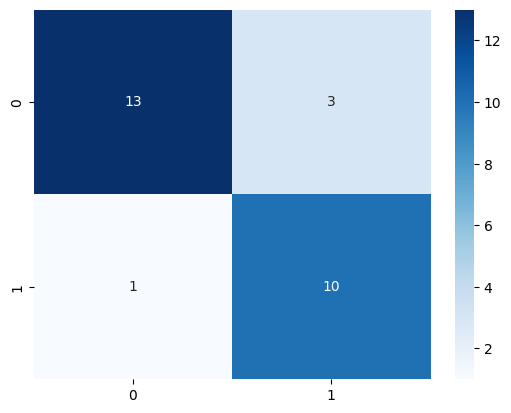

In [17]:
st.subheader(f"Model Performance: {model_choice}")
st.text(classification_report(y_test, y_pred))
st.write("Confusion Matrix")
fig_cm, ax_cm = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=ax_cm)
st.pyplot(fig_cm)

**PCA for visualization**

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [20]:
st.subheader("PCA - 2D Visualization")
fig_pca, ax_pca = plt.subplots()
scatter = ax_pca.scatter(X_pca[:, 0], X_pca[:, 1], c=y.astype(int), cmap='coolwarm', alpha=0.6)
legend1 = ax_pca.legend(*scatter.legend_elements(), title="Class")
ax_pca.add_artist(legend1)
st.pyplot(fig_pca)

2025-07-12 11:16:39.585 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:39.591 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:39.594 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:39.624 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:40.080 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:40.081 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:16:40.083 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

**KMeans clustering**

In [22]:
from sklearn.cluster import KMeans


st.subheader("KMeans Clustering")
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)
fig_kmeans, ax_kmeans = plt.subplots()
ax_kmeans.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='Set1')
st.pyplot(fig_kmeans)

2025-07-12 11:18:39.178 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:18:39.181 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:18:39.183 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:18:39.305 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:18:40.017 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:18:40.022 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:18:40.026 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [23]:
# Correlation heatmap
st.subheader("Feature Correlation Heatmap")
fig_corr, ax_corr = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, ax=ax_corr)
st.pyplot(fig_corr)

2025-07-12 11:19:02.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:19:02.442 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:19:02.445 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:19:02.840 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:19:03.916 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:19:03.917 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:19:03.919 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [25]:
if model_choice == "Random Forest":
    st.subheader("Feature Importances")
    importances = model.feature_importances_
    indices = np.argsort(importances)[-10:]  # Top 10
    fig_fi, ax_fi = plt.subplots()
    ax_fi.barh(range(len(indices)), importances[indices], align="center")
    ax_fi.set_yticks(range(len(indices)))
    ax_fi.set_yticklabels([features.columns[i] for i in indices])
    st.pyplot(fig_fi)

In [27]:
st.markdown("---")
st.markdown("### Conclusion")
st.markdown("Youth tobacco usage varies significantly across states and is influenced by exposure to smoking environments and advertisements. Machine learning models like Random Forest helped identify key predictors such as prior tobacco use, exposure at school, and early age initiation. Clustering and PCA visualizations revealed natural groupings among states. These insights can support data-driven health interventions and targeted anti-tobacco campaigns.")

st.caption("Developed with Streamlit | ML models on Tobacco Use Survey")

2025-07-12 11:21:35.248 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:21:35.249 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:21:35.250 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:21:35.251 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:21:35.252 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:21:35.252 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:21:35.253 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 11:21:35.254 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()